In this script the percentage of cell types over time was visualized. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scanpy as sc
import scanpy.external as se
from anndata import *
from itertools import product
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
sc.logging.print_versions()


-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                 9.4.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           0.8.3
h5py                3.9.0
hypergeom_ufunc     NA
igraph              0.10.8
invgauss_ufunc      NA
ipykernel           6.25.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.40.1
louvain             0.8.1
matplotlib          3.7.2
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.4.0
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
numba               0.57.1
numexpr             2.8.4
numpy               1.24.3
packaging           23.1
pandas              2.0.3
parso            

In [2]:
data_path = 'C:/Users/Helene/Documents/Master_Thesis/TabulaMurisSenis/Data/droplet_liver_angela.h5ad'
adata = read_h5ad(data_path)

In [3]:
# change the index of the adata object
adata.var = adata.var.set_index('feature_name')
tempAdata = adata.raw.to_adata()
tempAdata.var_names = adata.var_names
adata.raw = tempAdata

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:887: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [7]:
# colors
color_dict = {
    'hepatocyte': '#99CCCC',
    'endothelial cell of hepatic sinusoid': '#BDDC7A',
    'Kupffer cell': '#91B0CF',
    'hepatic stellate cell': '#80B1D3',
    'natural killer cell': '#E49C9C',
    'plasmacytoid dendritic cell': '#D9D9D9',
    'B cell': '#EBB770',
    'myeloid leukocyte': '#7CB296',
    'duct epithelial cell': '#6E78A2'
}
distinct_cmap = ListedColormap([color_dict[key] for key in color_dict])

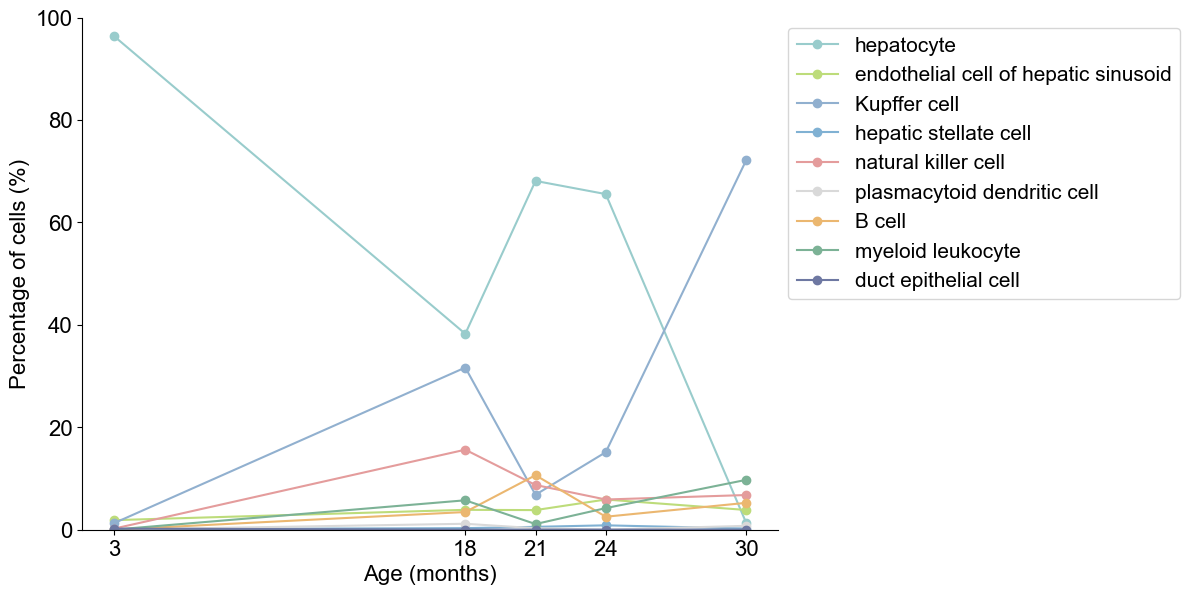

In [8]:
droplet = adata[adata.obs['age'] != '1m']
age_categories = droplet.obs['age'].unique().tolist()
cell_categories = droplet.obs['cell_type'].unique().tolist()
#cell_categories = ['B cell', 'Kupffer cell', 'NK cell','endothelial cell of hepatic sinusoid', 'hepatic stellate cell', 'hepatocyte', 'myeloid leukocyte','plasmacytoid dendritic cell','duct epithelial cell' ]
frame = pd.DataFrame(columns=cell_categories, index=age_categories)
frame = frame.reindex([ '3m', '18m', '21m', '24m', '30m' ])

# calculate the percentage
for age in age_categories:
    for cell in cell_categories:
        count_celltype = (droplet.obs['cell_type'].isin([cell]) & droplet.obs['age'].isin([age])).sum()
        
        count_all = (droplet.obs['age'].isin([age])).sum()
        percentage = count_celltype/count_all*100
        frame.loc[age, cell] = percentage

# rename time points
frame['label'] = frame.index
frame['label'] = frame['label'].str[:-1].astype(int)
frame.index = frame['label']
frame = frame.drop(columns=['label'])

# plot
frame.plot(kind='line',  figsize=(12, 6), colormap=distinct_cmap, marker='o')
plt.xticks([3, 18, 21, 24, 30], fontsize=16, fontfamily='arial')
plt.yticks(fontsize=16, fontfamily='arial')
plt.xlabel('Age (months)', fontsize=16, fontfamily='arial')
plt.ylabel('Percentage of cells (%)', fontsize=16, fontfamily='arial')
plt.legend(loc= 'upper left',bbox_to_anchor=(1, 1), fontsize=16, prop={'family': 'arial', 'size': 15})
plt.tight_layout()
ax = plt.gca() 
ax.set_ylim([0, 100])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)